Peregunta a ser respondida: Como poderíamos avaliar e prever/visualizar os agentes/fenômenos que mais
causam impactos socioeconômicos no Brasil?

In [8]:
#imports

#manipulação de dados
import pandas as pd
import numpy as np
#visualização de dados
import matplotlib.pyplot as ptl

#machine learning
from sklearn.neural_network import MLPRegressor 
from sklearn.preprocessing import StandardScaler 
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge

from sklearn import datasets, linear_model
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import KFold, cross_val_score

#formatar valores para 2 casas decimais
pd.options.display.float_format =  '{:.4f}'.format

In [9]:
#Visualizar dados atuais
data = pd.read_csv('\Desafio2\Modelo-Preditivo-Socioecon-mico\data\database_rispMG.csv', sep = ";")
data.head()

,risp,total_crimes,latitude,longitude,populacao,renda_media,idh_medio,taxa_de_analfabetismo(%),esperança_vida
0,1,156,-19.9167,-43.9345,2315560,3341.2000,0.8100,2.2200,76.3700
1,2,2808,-19.7668,-44.0868,1905395,1305.2020,0.6950,3.8810,75.2970
2,3,2808,-19.6944,-43.9237,988106,1495.4600,0.7150,3.5990,75.4640
3,4,13416,-21.7642,-43.3496,1574197,1150.6200,0.6730,4.8800,74.8310
4,5,4680,-19.7479,-47.9319,823093,1603.2000,0.7120,4.6430,76.4790


In [10]:
data.shape

(19, 9)

In [11]:
data.dtypes

risp                          int64
total_crimes                  int64
latitude                    float64
longitude                   float64
populacao                     int64
renda_media                 float64
idh_medio                   float64
taxa_de_analfabetismo(%)    float64
esperança_vida              float64
dtype: object

Engenharia de Atributos

In [12]:
#Numero de Crimes por 100 mil habitantes
data['crimes_porhab(100K)'] = data['total_crimes']/(data['populacao']/100000)

#Razão entre a renda média e o numero de crimes
data['crimes_renda'] = data['total_crimes']/data['renda_media']


#Razão entre taxa de analfabetismo e numero de crimes
data['crimes_educ'] = data['total_crimes']/data['taxa_de_analfabetismo(%)']

#Razão entre esperança de vida e renda média
data['esperança_vida_renda'] = data['esperança_vida']/data['renda_media']

#Razão entre esperança de vida e total de crimes
data['esperança_vida_renda'] = data['esperança_vida']/data['total_crimes']

data.head(19)



,risp,total_crimes,latitude,longitude,populacao,renda_media,idh_medio,taxa_de_analfabetismo(%),esperança_vida,crimes_porhab(100K),crimes_renda,crimes_educ,esperança_vida_renda
0,1,156,-19.9167,-43.9345,2315560,3341.2000,0.8100,2.2200,76.3700,6.7370,0.0467,70.2703,0.4896
1,2,2808,-19.7668,-44.0868,1905395,1305.2020,0.6950,3.8810,75.2970,147.3710,2.1514,723.5249,0.0268
2,3,2808,-19.6944,-43.9237,988106,1495.4600,0.7150,3.5990,75.4640,284.1800,1.8777,780.2167,0.0269
3,4,13416,-21.7642,-43.3496,1574197,1150.6200,0.6730,4.8800,74.8310,852.2440,11.6598,2749.1803,0.0056
4,5,4680,-19.7479,-47.9319,823093,1603.2000,0.7120,4.6430,76.4790,568.5870,2.9192,1007.9690,0.0163
5,6,6864,-21.2475,-44.9997,880430,1268.9700,0.6950,5.3770,75.2850,779.6190,5.4091,1276.5483,0.0110
6,7,7800,-20.1452,-44.8912,1182836,1361.8800,0.7020,4.3700,75.6690,659.4321,5.7274,1784.8970,0.0097
7,8,9048,-18.8545,-41.9459,687921,843.5800,0.6300,9.8450,73.2090,1315.2673,10.7257,919.0452,0.0081
8,9,2808,-18.9128,-48.2755,1100550,1500.4000,0.7140,3.9750,75.9820,255.1452,1.8715,706.4151,0.0271
9,10,3588,-19.0003,-46.3162,534508,1487.9900,0.7070,5.2030,75.6070,671.2715,2.4113,689.6022,0.0211


Retirar as colunas de coordenadas não necessárias para o estudo atual

In [13]:
#Salvando código de cada região para visualização
risp = data['risp']

data.drop('risp', axis=1, inplace=True)
data.drop('latitude', axis=1, inplace=True)
data.drop('longitude', axis=1, inplace=True)
data.drop('populacao', axis=1, inplace=True)

data.to_csv('\Desafio2\Modelo-Preditivo-Socioecon-mico\data\databaseML.csv', sep=";")

data.head()

,total_crimes,renda_media,idh_medio,taxa_de_analfabetismo(%),esperança_vida,crimes_porhab(100K),crimes_renda,crimes_educ,esperança_vida_renda
0,156,3341.2000,0.8100,2.2200,76.3700,6.7370,0.0467,70.2703,0.4896
1,2808,1305.2020,0.6950,3.8810,75.2970,147.3710,2.1514,723.5249,0.0268
2,2808,1495.4600,0.7150,3.5990,75.4640,284.1800,1.8777,780.2167,0.0269
3,13416,1150.6200,0.6730,4.8800,74.8310,852.2440,11.6598,2749.1803,0.0056
4,4680,1603.2000,0.7120,4.6430,76.4790,568.5870,2.9192,1007.9690,0.0163


In [14]:
#Descrição Estatística dos dados
data.describe()

,total_crimes,renda_media,idh_medio,taxa_de_analfabetismo(%),esperança_vida,crimes_porhab(100K),crimes_renda,crimes_educ,esperança_vida_renda
count,19.0000,19.0000,19.0000,19.0000,19.0000,19.0000,19.0000,19.0000,19.0000
mean,7003.5789,1289.0727,0.6851,6.2810,74.7971,739.4791,6.8496,1159.2202,0.0395
std,4259.5253,569.8813,0.0449,3.4176,1.2099,379.0842,5.2434,714.5262,0.1093
min,156.0000,663.0300,0.6070,2.2200,72.4720,6.7370,0.0467,70.2703,0.0049
25%,2808.0000,1004.0015,0.6625,4.1725,74.0535,572.4420,2.2813,698.0086,0.0078
50%,7800.0000,1238.8800,0.6950,5.1570,75.2850,776.2458,5.7274,919.0452,0.0097
75%,9438.0000,1454.0880,0.7070,6.9490,75.6380,988.9811,10.2473,1740.7776,0.0268
max,15132.0000,3341.2000,0.8100,16.0330,76.4790,1315.2673,18.1168,2749.1803,0.4896


In [15]:
#Separação dos Dados para treino, teste e validação
qtdLine = len(data)

qtdTrain = qtdLine - 9
qtdTest = qtdLine - 3
qtdValidade = qtdTrain - qtdTest

info = (
    f"linhas treino = 0:{qtdTrain}"
    f" linhas teste = {qtdTrain}:{qtdTest}"
    f" linhas validacao = {qtdTest}:{qtdLine}"

) 
info

'linhas treino = 0:10 linhas teste = 10:16 linhas validacao = 16:19'

Definição das Variáveis PREDITORAS e da Variável ALVO

In [16]:
target = data['idh_medio']
preditoras = data.drop('idh_medio', axis=1)

In [17]:
target.head()

0   0.8100
1   0.6950
2   0.7150
3   0.6730
4   0.7120
Name: idh_medio, dtype: float64

In [18]:
preditoras.head()

preditoras.to_csv('\Desafio2\Modelo-Preditivo-Socioecon-mico\data\preditoras.csv', sep=";")

preditoras

,total_crimes,renda_media,taxa_de_analfabetismo(%),esperança_vida,crimes_porhab(100K),crimes_renda,crimes_educ,esperança_vida_renda
0,156,3341.2000,2.2200,76.3700,6.7370,0.0467,70.2703,0.4896
1,2808,1305.2020,3.8810,75.2970,147.3710,2.1514,723.5249,0.0268
2,2808,1495.4600,3.5990,75.4640,284.1800,1.8777,780.2167,0.0269
3,13416,1150.6200,4.8800,74.8310,852.2440,11.6598,2749.1803,0.0056
4,4680,1603.2000,4.6430,76.4790,568.5870,2.9192,1007.9690,0.0163
5,6864,1268.9700,5.3770,75.2850,779.6190,5.4091,1276.5483,0.0110
6,7800,1361.8800,4.3700,75.6690,659.4321,5.7274,1784.8970,0.0097
7,9048,843.5800,9.8450,73.2090,1315.2673,10.7257,919.0452,0.0081
8,2808,1500.4000,3.9750,75.9820,255.1452,1.8715,706.4151,0.0271
9,3588,1487.9900,5.2030,75.6070,671.2715,2.4113,689.6022,0.0211


Normalização dos Dados

In [19]:
scaler = StandardScaler().fit(preditoras)
preditoras_s = scaler.transform(preditoras)

In [20]:
preditoras_s.shape

(19, 8)

Separação dos dados para treinamento

In [21]:
#Treino
X_Train = preditoras_s[0:qtdTrain]
y_Train = target[0:qtdTrain]

#Teste
X_Test = preditoras_s[qtdTrain:qtdTest]
y_Test = target[qtdTrain:qtdTest]

#Quantidade de Registros
print("Treino: ", "X: ", len(X_Train), "Y: ", len(y_Train))
print("Teste: ", "X: ", len(X_Test), "Y: ", len(y_Test))

Treino:  X:  10 Y:  10
Teste:  X:  6 Y:  6


In [22]:
print(X_Train.shape, y_Train.shape)
print(X_Test.shape, y_Test.shape)


(10, 8) (10,)
(6, 8) (6,)


Utilizando Modelo de Regressão Linear

In [23]:
#Criação do Modelo
lr = linear_model.LinearRegression()

lr.fit(X_Train, y_Train)

#Previsão
pred = lr.predict(X_Test)

#Avaliando Precisão
cd = r2_score(y_Test, pred)
mae = mean_absolute_error(y_Test, pred)

print(f"R2: {cd * 100:.2f}")
print(f"Erro Absoluto: {mae}")

R2: -3154.79
Erro Absoluto: 0.10417526636021357


Treinando Modelo de Rede Neural

In [24]:
ns = MLPRegressor(max_iter=5000)

#Treinamento
ns.fit(X_Train, y_Train)

#Previsão
pred = ns.predict(X_Test)

#Avaliando Precisão
cd = r2_score(y_Test, pred)
mae = mean_absolute_error(y_Test, pred)

print(f"R2: {cd * 100:.2f}")
print(f"Erro Absoluto: {mae}")

R2: -4197.48
Erro Absoluto: 0.1345145724992497


Treinando Modelo de Arvore de Decisão

In [25]:
dt = DecisionTreeRegressor()

#Treinando Modelo
dt.fit(X_Train, y_Train)

pred = dt.predict(X_Test)

cd = r2_score(y_Test, pred)
mae = mean_absolute_error(y_Test, pred)

print(f"R2: {cd * 100:.2f}")
print(f"Erro Absoluto: {mae}")

R2: -140.00
Erro Absoluto: 0.034999999999999996


Modelo de Ridge Regressor

In [26]:
rr = Ridge(alpha=1.0)

rr.fit(X_Train, y_Train)

pred = rr.predict(X_Test)

cdFixo = r2_score(y_Test, pred)
maeFixo = mean_absolute_error(y_Test, pred)

print(f"R2: {cdFixo * 100:.2f}")
print(f"Erro Absoluto: {maeFixo}")


R2: 96.68
Erro Absoluto: 0.003342639473810305


In [27]:
#Adicionando previsão dos valores
preditoras_s = scaler.transform(preditoras)

predictRR = rr.predict(preditoras_s)
predictRR

array([0.80794499, 0.70413933, 0.71052867, 0.6741593 , 0.71546599,
       0.68890382, 0.6983429 , 0.63556163, 0.7145878 , 0.70336558,
       0.61398542, 0.64902859, 0.66752488, 0.63685807, 0.60785605,
       0.67440325, 0.68171465, 0.69826515, 0.69391664])

Utilização de Cross-Vallidation no Treinamento dos Modelos

In [28]:
from sklearn.model_selection import KFold

In [29]:
cv = KFold(n_splits=5,shuffle=True,random_state=0)


In [30]:
folds = []

for train_idx, val_idx in cv.split(preditoras):
    X_train = preditoras.iloc[train_idx]
    X_val   = preditoras.iloc[val_idx]
    
    y_train = target.iloc[train_idx]
    y_val   = target.iloc[val_idx]
    
    folds.append((X_train, X_val, y_train, y_val, val_idx))


Modelo de Regressão Linear

In [31]:
cd = []
mae = []

for X_train, X_val, y_train, y_val, val_idx in folds:
    scaler = StandardScaler()
    
    X_train_s = scaler.fit_transform(X_train)
    X_val_s   = scaler.transform(X_val)

    #Criação do Modelo
    lr = linear_model.LinearRegression()

    lr.fit(X_train_s, y_train)

    #Previsão
    pred = lr.predict(X_val_s)

    #Avaliando Precisão
    cd.append(r2_score(y_val, pred))
    mae.append(mean_absolute_error(y_val, pred))

print(f"R2 médio: { np.mean(cd)* 100:.2f}")
print(f"Erro Absoluto: {np.mean(mae)}")
print(f"Desvio padrão: {np.std(mae)}")

R2 médio: 88.69
Erro Absoluto: 0.009574550207490604
Desvio padrão: 0.004129402204326451


Modelo de Rede Neural

In [32]:
cd = []
mae = []

for X_train, X_val, y_train, y_val, val_idx in folds:
    scaler = StandardScaler()
    
    X_train_s = scaler.fit_transform(X_train)
    X_val_s   = scaler.transform(X_val)

    #Criação do Modelo
    ns = MLPRegressor(max_iter=2000)

    ns.fit(X_train_s, y_train)

    #Previsão
    pred = ns.predict(X_val_s)

    #Avaliando Precisão
    cd.append(r2_score(y_val, pred))
    mae.append(mean_absolute_error(y_val, pred))

print(f"R2 médio: { np.mean(cd)* 100:.2f}")
print(f"Erro Absoluto: {np.mean(mae)}")
print(f"Desvio padrão: {np.std(mae)}")

R2 médio: -94859.94
Erro Absoluto: 0.6383859981471478
Desvio padrão: 1.0593950648907995


Modelo de Arvore de Decisão

In [33]:
cd = []
mae = []

for X_train, X_val, y_train, y_val, val_idx in folds:
    scaler = StandardScaler()
    
    X_train_s = scaler.fit_transform(X_train)
    X_val_s   = scaler.transform(X_val)

    #Criação do Modelo
    dt = DecisionTreeRegressor()

    dt.fit(X_train_s, y_train)

    #Previsão
    pred = dt.predict(X_val_s)

    #Avaliando Precisão
    cd.append(r2_score(y_val, pred))
    mae.append(mean_absolute_error(y_val, pred))

print(f"R2 médio: { np.mean(cd)* 100:.2f}")
print(f"Erro Absoluto: {np.mean(mae)}")
print(f"Desvio padrão: {np.std(mae)}")

R2 médio: 52.42
Erro Absoluto: 0.021316666666666678
Desvio padrão: 0.01800118823238562


Modelo de Ridge Regressor

In [34]:
cd = []
maeRigid = []
predictList = np.zeros(len(target))


for X_train, X_val, y_train, y_val, val_idx in folds:

    scaler = StandardScaler()
    X_train_s = scaler.fit_transform(X_train)
    X_val_s   = scaler.transform(X_val)

    #Criação do Modelo
    rr = Ridge(alpha=1.0)

    rr.fit(X_train_s, y_train)

    #Previsão
    pred = rr.predict(X_val_s)

    predictList[val_idx] = pred

    #Avaliando Precisão
    cd.append(r2_score(y_val, pred))
    maeRigid.append(mean_absolute_error(y_val, pred))


print(f"R2 médio: { np.mean(cd)* 100:.2f}")
print(f"Erro Absoluto: {np.mean(maeRigid)}")
print(f"Desvio padrão: {np.std(maeRigid)}")

R2 médio: 95.87
Erro Absoluto: 0.006008375270993362
Desvio padrão: 0.0016873731036947896


Teste do hiperparâmetro Alpha do modelo

In [35]:

alphaValues = [0.25, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2.0, 3.0, 4.0]
erroAlpha = []

for alpha in alphaValues:

    predictList = np.zeros(len(target))
    cd = []
    maeRigid = []

    for X_train, X_val, y_train, y_val, val_idx in folds:
        scaler = StandardScaler()
    
        X_train_s = scaler.fit_transform(X_train)
        X_val_s   = scaler.transform(X_val)

        #Criação do Modelo
        rr = Ridge(alpha=alpha)

        rr.fit(X_train_s, y_train)

        #Previsão
        pred = rr.predict(X_val_s)

        predictList[val_idx] = pred

        #Avaliando Precisão
        cd.append(r2_score(y_val, pred))
        maeRigid.append(mean_absolute_error(y_val, pred))

    erroAlpha.append(np.mean(maeRigid))
    print(f" Alpha = {alpha} | R2 médio: { np.mean(cd)* 100:.2f} | Erro Médio Absoluto: {np.mean(maeRigid)}")


 Alpha = 0.25 | R2 médio: 95.07 | Erro Médio Absoluto: 0.006776442616523486
 Alpha = 0.5 | R2 médio: 95.69 | Erro Médio Absoluto: 0.006255577480906526
 Alpha = 0.75 | R2 médio: 95.86 | Erro Médio Absoluto: 0.00606066883561956
 Alpha = 1.0 | R2 médio: 95.87 | Erro Médio Absoluto: 0.006008375270993362
 Alpha = 1.25 | R2 médio: 95.83 | Erro Médio Absoluto: 0.0060346032489532134
 Alpha = 1.5 | R2 médio: 95.74 | Erro Médio Absoluto: 0.0061071801614057935
 Alpha = 1.75 | R2 médio: 95.63 | Erro Médio Absoluto: 0.006205452990344061
 Alpha = 2.0 | R2 médio: 95.50 | Erro Médio Absoluto: 0.006309893846092015
 Alpha = 3.0 | R2 médio: 94.92 | Erro Médio Absoluto: 0.006728793542161572
 Alpha = 4.0 | R2 médio: 94.29 | Erro Médio Absoluto: 0.007103493084813194


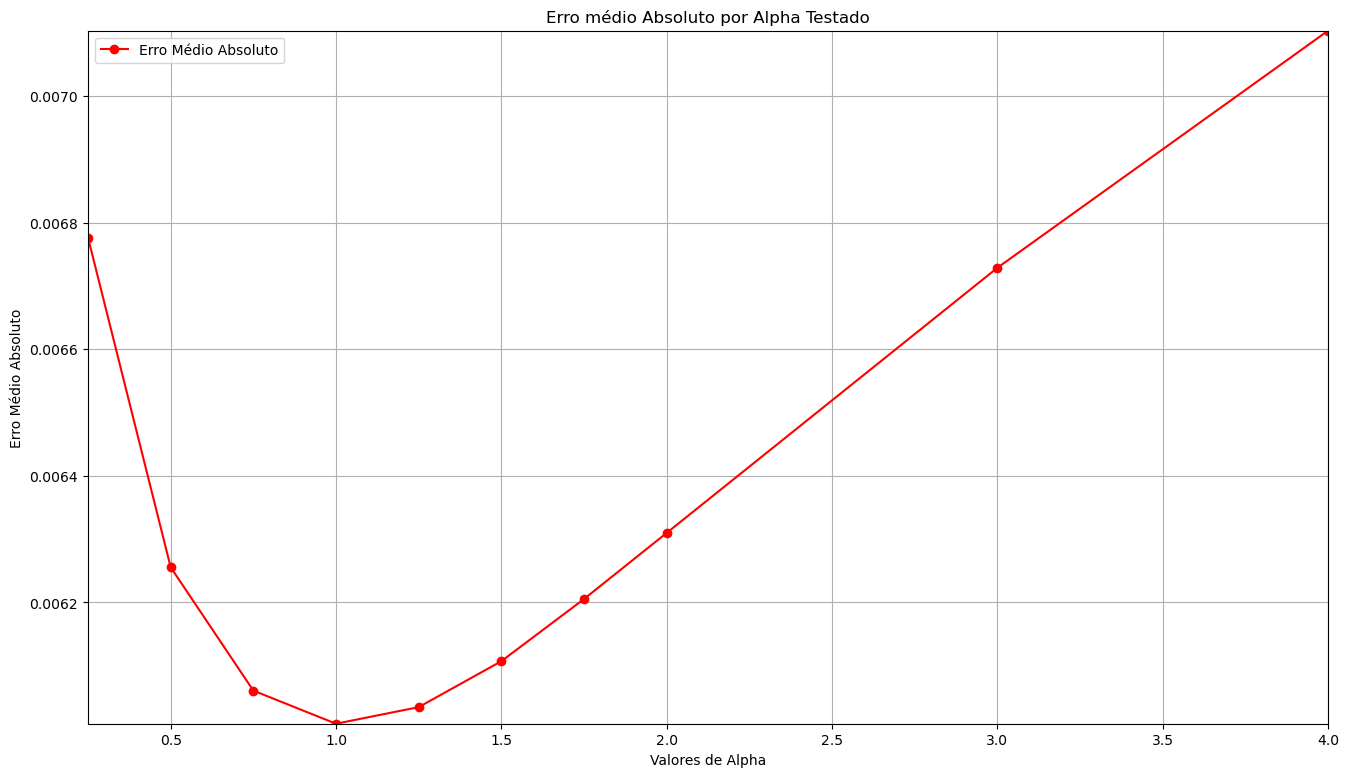

In [36]:
dfAlpha = pd.DataFrame({'Valores de Alpha':alphaValues, 'Erro Médio Absoluto': erroAlpha})

ptl.figure(figsize=(16,9))
ptl.plot(dfAlpha['Valores de Alpha'], dfAlpha['Erro Médio Absoluto'], color='red', label="Erro Médio Absoluto", marker='o')
ptl.xlabel('Valores de Alpha')
ptl.xlim(dfAlpha['Valores de Alpha'].min(), dfAlpha['Valores de Alpha'].max())
ptl.ylim(dfAlpha['Erro Médio Absoluto'].min(), dfAlpha['Erro Médio Absoluto'].max())
ptl.ylabel('Erro Médio Absoluto')
ptl.title('Erro médio Absoluto por Alpha Testado')
ptl.grid(True)
leg = ptl.legend()


Alpha = 1.0

In [37]:
cdCv = []
maeRigidCv = []
predictList = np.zeros(len(target))


for X_train, X_val, y_train, y_val, val_idx in folds:

    scaler = StandardScaler()
    X_train_s = scaler.fit_transform(X_train)
    X_val_s   = scaler.transform(X_val)

    #Criação do Modelo
    rr = Ridge(alpha=1.0)

    rr.fit(X_train_s, y_train)

    #Previsão
    pred = rr.predict(X_val_s)

    predictList[val_idx] = pred

    #Avaliando Precisão
    cdCv.append(r2_score(y_val, pred))
    maeRigidCv.append(mean_absolute_error(y_val, pred))


print(f"R2 médio: { np.mean(cdCv)* 100:.2f}")
print(f"Erro Absoluto: {np.mean(maeRigidCv)}")
print(f"Desvio padrão: {np.std(maeRigidCv)}")

R2 médio: 95.87
Erro Absoluto: 0.006008375270993362
Desvio padrão: 0.0016873731036947896


Modelo Ridge Regressor apresentou melhor eficiência tanto utilizando um split de dados fixo quado utilizando cross-vallidation

Prova dos resultados

In [38]:

idhReal = data['idh_medio']

proofTable = pd.DataFrame({'RISP': risp, 'IDH real': idhReal, 'Previsão(Cross-Validation)':predictList, 'Previsão(Split Fixo)': predictRR})
proofTable.to_csv('\Desafio2\Modelo-Preditivo-Socioecon-mico\data\predict.csv', sep = ";")

proofTable

,RISP,IDH real,Previsão(Cross-Validation),Previsão(Split Fixo)
0,1,0.8100,0.8307,0.8079
1,2,0.6950,0.7096,0.7041
2,3,0.7150,0.7096,0.7105
3,4,0.6730,0.6828,0.6742
4,5,0.7120,0.7188,0.7155
5,6,0.6950,0.6901,0.6889
6,7,0.7020,0.7003,0.6983
7,8,0.6300,0.6404,0.6356
8,9,0.7140,0.7191,0.7146
9,10,0.7070,0.7027,0.7034


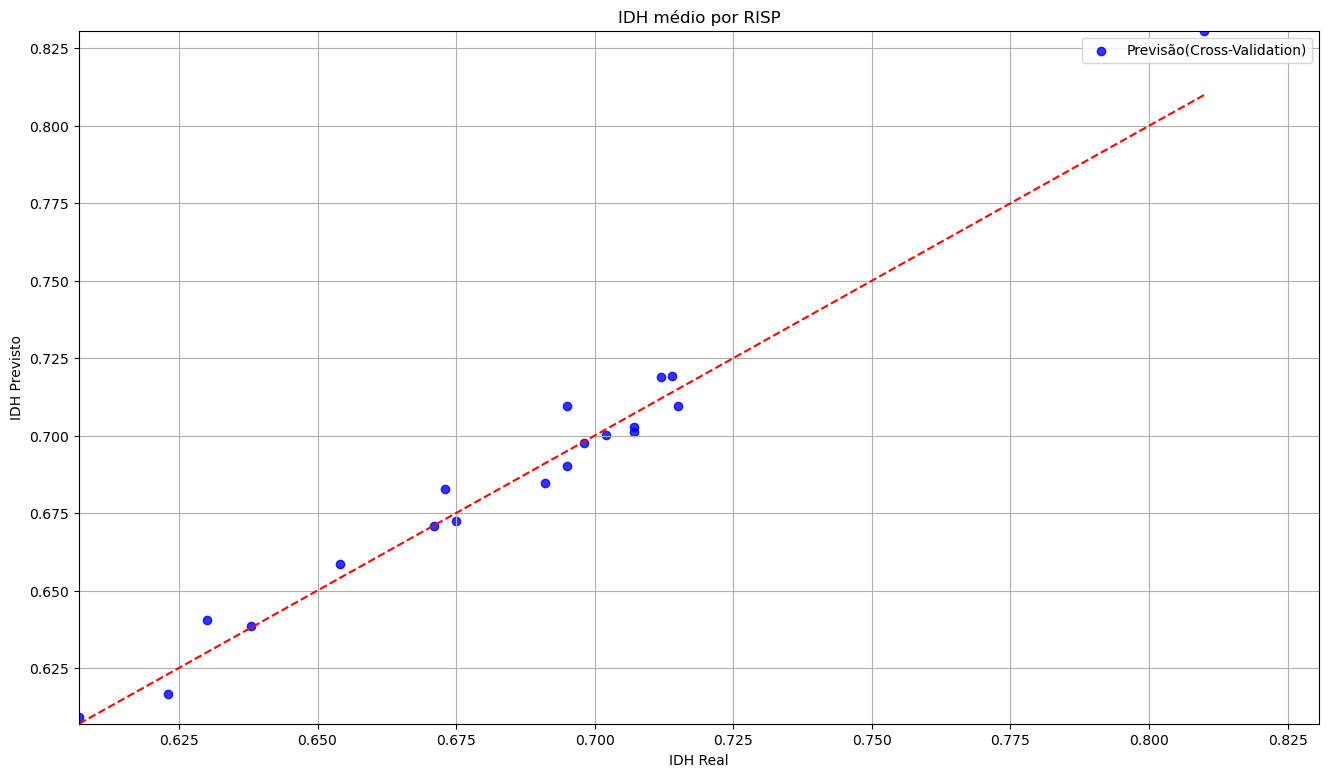

In [39]:
#Gerar Gráfico
ptl.figure(figsize=(16,9))
ptl.scatter(target, predictList, alpha=0.8, label = "Previsão(Cross-Validation)", color='blue')
ptl.plot([target.min(), target.max()], [target.min(), target.max()], 'r--')
limit = [min(target.min(), predictList.min()), max(target.max(), predictList.max())]
ptl.xlim(limit)
ptl.ylim(limit)
ptl.title("IDH médio por RISP")
ptl.xlabel("IDH Real")
ptl.ylabel("IDH Previsto")
ptl.grid(True)
leg = ptl.legend()

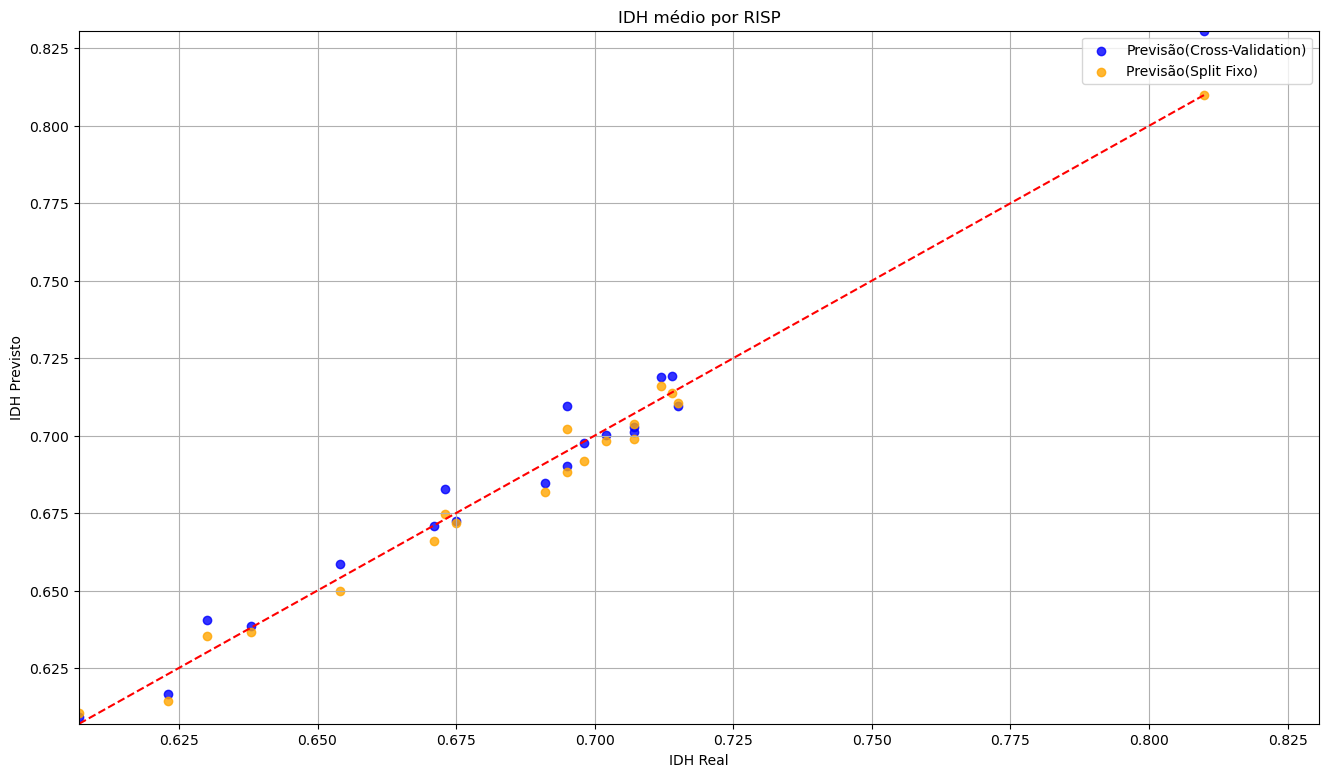

In [384]:
#Gerar Gráfico
ptl.figure(figsize=(16,9))
ptl.scatter(target, predictList, alpha=0.8, label = "Previsão(Cross-Validation)", color='blue')
ptl.scatter(target, predictRR, alpha=0.8, label = "Previsão(Split Fixo)", color='orange')
ptl.plot([target.min(), target.max()], [target.min(), target.max()], 'r--')
limit = [min(target.min(), predictList.min()), max(target.max(), predictList.max())]
ptl.xlim(limit)
ptl.ylim(limit)
ptl.title("IDH médio por RISP")
ptl.xlabel("IDH Real")
ptl.ylabel("IDH Previsto")
ptl.grid(True)
leg = ptl.legend()

O gráfico de dispersão entre os valores reais e previstos do IDH indica elevada aderência do modelo Ridge à diagonal de referência, sugerindo bom desempenho preditivo.

De primeira, percebemos que o treinamento com split fixo se mostra mais preciso, porém, ao escolher um split diferente temos a seguinte situação:

In [271]:
qtdLine = len(data)

qtdTrain = qtdLine - 5
qtdTest = qtdLine

#Treino
X_Train = preditoras_s[0:qtdTrain]
y_Train = target[0:qtdTrain]

#Teste
X_Test = preditoras_s[qtdTrain:qtdTest]
y_Test = target[qtdTrain:qtdTest]

#Quantidade de Registros
print("Treino: ", "X: ", len(X_Train), "Y: ", len(y_Train))
print("Teste: ", "X: ", len(X_Test), "Y: ", len(y_Test))

Treino:  X:  14 Y:  14
Teste:  X:  5 Y:  5


In [272]:
rr = Ridge(alpha=1.0)

rr.fit(X_Train, y_Train)

pred = rr.predict(X_Test)

cd = r2_score(y_Test, pred)
mae = mean_absolute_error(y_Test, pred)

print(f"Coeficiente de regressão: {cd * 100:.2f}")
print(f"Erro Absoluto: {mae}")

Coeficiente de regressão: 97.08
Erro Absoluto: 0.005389254578814451


O modelo apresenta um Coeficiente de regressão maior, porém apresenta um erro absoluto maior. Há uma variância na eficiência do modelo com base na escolha do split. O cross validation permite diminuir a variância por usar varios splits diferentes, treinando o modelo com todos os dados do dataset

Criando um Json com as métricas do modelo

In [388]:
import json

metrics = {
    "modelo" : "Ridge Regressor",
    "cross_validation": "KFold(n_splits=5)",
    "R2_splitFixo": float(cdFixo),
    "MAE_splitFixo":float(maeFixo),
    "R2_mean": float(np.mean(cdCv)),
    "R2_std": float(np.std(cdCv)),
    "MAE_mean": float(np.mean(maeRigidCv)),
    "MAE_std": float(np.std(maeRigidCv)),
}

with open('\Desafio2\Modelo-Preditivo-Socioecon-mico\data\metrics.json', "w") as f:
    json.dump(metrics, f, indent=4)

Utilizando o método LOFO (Leave-One-Feature-Out) como primeira forma de avaliar o comportamento de cada parâmetro na previsão do IDH

In [274]:
maeBase = np.mean(maeRigid) #Variavel que vem da ultima célula de treinamento
impactoLofo = {}

for column in preditoras.columns:
    preditorasDrop = preditoras.drop(columns=[column])

    #criação de uma lista de erros nas previsões
    maeVet = []

    for train_idx, val_idx in cv.split(preditorasDrop):
        X_train = preditorasDrop.iloc[train_idx]
        X_val = preditorasDrop.iloc[val_idx]
        y_train = target.iloc[train_idx]
        y_val = target.iloc[val_idx]

        #Normalização
        scaler = StandardScaler()
        X_train_s = scaler.fit_transform(X_train)
        X_val_s = scaler.transform(X_val)

        #Criação e treinamento do modelo 
        rr = Ridge(alpha=1.0)
        rr.fit(X_train_s, y_train)
        
        #Previsão
        pred = rr.predict(X_val_s)
        #Adiciona um novo erro à lista de erros do fold
        maeVet.append(mean_absolute_error(y_val, pred))

    impactoLofo[column] = np.mean(maeVet) - maeBase
    print(f"Erro sem a coluna {column}: {np.mean(maeVet)}. Delta erro: {impactoLofo[column]}")



Erro sem a coluna total_crimes: 0.007888756886552703. Delta erro: 0.0007852638017395094
Erro sem a coluna renda_media: 0.007799174181226785. Delta erro: 0.0006956810964135916
Erro sem a coluna taxa_de_analfabetismo(%): 0.018409170648586. Delta erro: 0.011305677563772806
Erro sem a coluna esperança_vida: 0.011138686055578249. Delta erro: 0.004035192970765055
Erro sem a coluna crimes_porhab(100K): 0.009434580165920567. Delta erro: 0.0023310870811073733
Erro sem a coluna crimes_renda: 0.008456378144892432. Delta erro: 0.0013528850600792383
Erro sem a coluna crimes_educ: 0.004806149073492875. Delta erro: -0.0022973440113203186
Erro sem a coluna esperança_vida_renda: 0.005894573857226813. Delta erro: -0.0012089192275863804


Utilizar como base de análise:

ΔErro > 0
remover a variável piora o modelo
variável importante

ΔErro ≈ 0
variável redundante

ΔErro < 0
remover a variável melhora o modelo
possível ruído / colinearidade

Total de crimes => Piora pouco o modelo quando é removida (variável com certa importância)

Renda Média => Piora o modelo quando é removida (variável importante)

Taxa de analfabetismo => Piora muito o modelo quando removida (variável de extrema importância)

Esperança de Vida => Piora o modelo quando removida (variável importante)

Crimes por 100 mil habitantes => Piora muito o modelo quando removida (variável de extrema importância)

Crimes por média de renda => Piora o modelo quando removida (variável importante)

Crimes por taxa de alfabetização => Melhora o modelo quando removida (Possível ruído)

Esperança de vida por renda média => Variável redundante  

A variável taxa de analfabetismo foi a que teve maior diferença positiva no erro, ou seja, para o modelo é a variável mais importante, sendo de grande impacto para a definição do IDH

In [275]:
#visualização

dfLofo = pd.DataFrame({"Variável":impactoLofo.keys(), "Diferença de Erro":impactoLofo.values()}).sort_values("Diferença de Erro", ascending=True)

dfLofo.to_csv('\Desafio2\Modelo-Preditivo-Socioecon-mico\data\importance_lofo.csv', sep = ";")

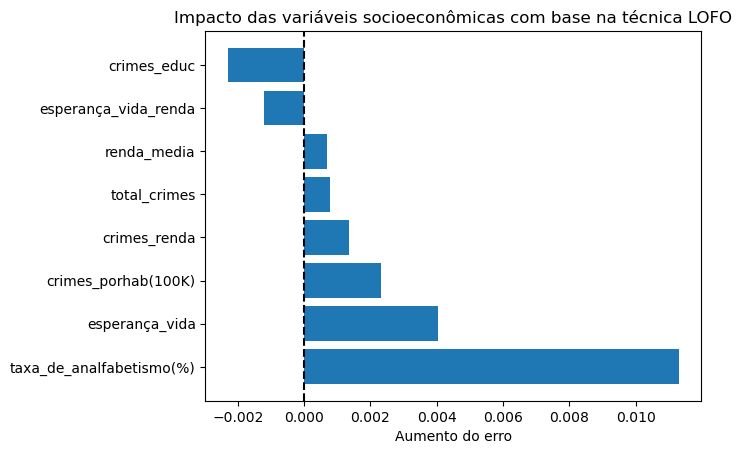

In [276]:
ptl.Figure(figsize=(16,9))
ptl.title("Impacto das variáveis socioeconômicas com base na técnica LOFO")
ptl.barh(dfLofo["Variável"], dfLofo["Diferença de Erro"])
ptl.axvline(0, color='k', linestyle='--')
ptl.xlabel("Aumento do erro")
ptl.gca().invert_yaxis()

Utilizando o método de importância por permutação

In [347]:
impactoPermut = {}

for column in preditoras.columns:

    deltaErro = []


    for train_idx, val_idx, in cv.split(preditoras):
        X_train = preditoras.iloc[train_idx].copy()
        X_val = preditoras.iloc[val_idx].copy()
        y_train = target.iloc[train_idx]
        y_val = target.iloc[val_idx]

        #Normalização
        scaler = StandardScaler()
        X_train_s = scaler.fit_transform(X_train)
        X_val_s = scaler.transform(X_val)

        rr = Ridge(alpha=1.0)
        rr.fit(X_train_s, y_train)

        # Erro base do fold (sem permutar nada)
        pred_base = rr.predict(X_val_s)
        mae_base  = mean_absolute_error(y_val, pred_base)

        mae_perm_list = []

        for n in range(50):
            
            # Permuta APENAS a coluna no X_val (cópia)
            X_val_perm = X_val.copy()
            X_val_perm[column] = np.random.permutation(X_val_perm[column].values)

            # Aplica o MESMO scaler do fold
            X_val_perm_s = scaler.transform(X_val_perm)

            # Erro permutado
            pred_perm = rr.predict(X_val_perm_s)
            mae_perm_list.append(mean_absolute_error(y_val, pred_perm))
            

        # Delta do fold
        deltaErro.append(np.mean(mae_perm_list) - mae_base)

    impactoPermut[column] = np.mean(deltaErro)
    print(f"Coluna permutada: {column} | Delta erro: {impactoPermut[column]}")
        

Coluna permutada: total_crimes | Delta erro: 8.325169932948051e-05
Coluna permutada: renda_media | Delta erro: 0.0070507086404541855
Coluna permutada: taxa_de_analfabetismo(%) | Delta erro: 0.004965605988544194
Coluna permutada: esperança_vida | Delta erro: 0.006076942806022738
Coluna permutada: crimes_porhab(100K) | Delta erro: 9.445352824132401e-05
Coluna permutada: crimes_renda | Delta erro: 0.0015681618388704611
Coluna permutada: crimes_educ | Delta erro: 0.00041506060171389917
Coluna permutada: esperança_vida_renda | Delta erro: 0.002569094255022431


In [348]:
dfPermut = pd.DataFrame({"Variável": impactoPermut.keys(),"Diferença de mae (Permutação)": impactoPermut.values()}).sort_values("Diferença de mae (Permutação)", ascending=True)

dfPermut.to_csv('\Desafio2\Modelo-Preditivo-Socioecon-mico\data\importnce_permut.csv', sep = ";")

dfPermut


,Variável,Diferença de mae (Permutação)
0,total_crimes,0.0001
4,crimes_porhab(100K),0.0001
6,crimes_educ,0.0004
5,crimes_renda,0.0016
7,esperança_vida_renda,0.0026
2,taxa_de_analfabetismo(%),0.0050
3,esperança_vida,0.0061
1,renda_media,0.0071


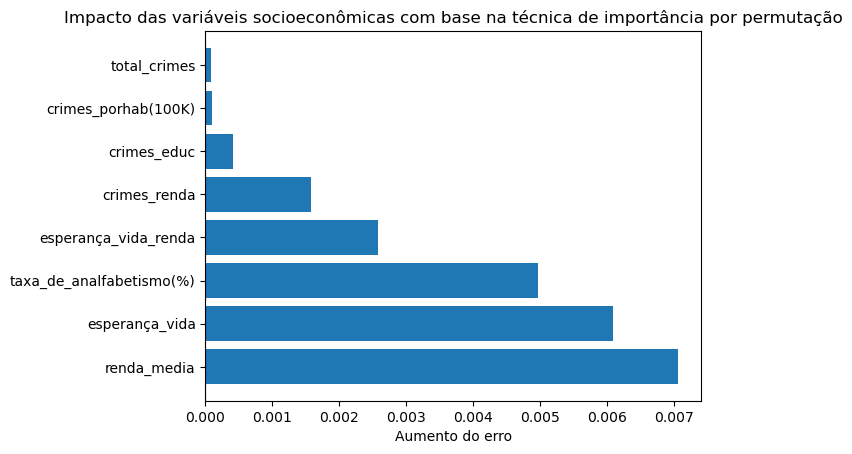

In [350]:
ptl.Figure(figsize=(16,9))
ptl.title("Impacto das variáveis socioeconômicas com base na técnica de importância por permutação")
ptl.barh(dfPermut["Variável"], dfPermut["Diferença de mae (Permutação)"])
ptl.axvline(0, color='k', linestyle='--')
ptl.xlabel("Aumento do erro")
ptl.gca().invert_yaxis()

Quanto maior o erro quando se permuta os valores da variável, mais importante ela é.

Análise de importância de fator com base na média da diferença de erro dos dois métodos

In [351]:
dfFinal = pd.DataFrame({'Variável': impactoLofo.keys(),'∆MAE (LOFO)': impactoLofo.values(), '∆MAE (Permutação)': impactoPermut.values()})

dfFinal['Média ∆MAE (Importância)'] = (dfFinal['∆MAE (LOFO)'] + dfFinal['∆MAE (Permutação)'])/2
dfFinal = dfFinal.sort_values("Média ∆MAE (Importância)", ascending=False)

dfFinal.to_csv('\Desafio2\Modelo-Preditivo-Socioecon-mico\data\dataset_importance.csv', sep = ";")
dfFinal

,Variável,∆MAE (LOFO),∆MAE (Permutação),Média ∆MAE (Importância)
2,taxa_de_analfabetismo(%),0.0113,0.0050,0.0081
3,esperança_vida,0.0040,0.0061,0.0051
1,renda_media,0.0007,0.0071,0.0039
5,crimes_renda,0.0014,0.0016,0.0015
4,crimes_porhab(100K),0.0023,0.0001,0.0012
7,esperança_vida_renda,-0.0012,0.0026,0.0007
0,total_crimes,0.0008,0.0001,0.0004
6,crimes_educ,-0.0023,0.0004,-0.0009


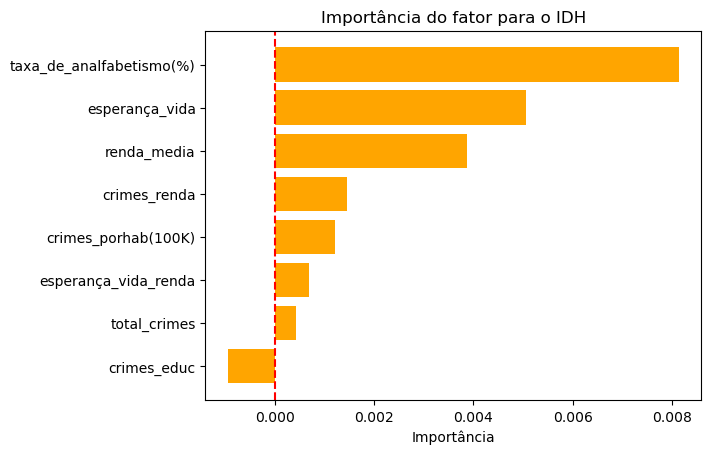

In [352]:
ptl.Figure(figsize=(16,9))
ptl.title("Importância do fator para o IDH")
ptl.barh(dfFinal["Variável"], dfFinal["Média ∆MAE (Importância)"], color='orange')
ptl.axvline(0, color='red', linestyle='--')
ptl.xlabel("Importância")
ptl.gca().invert_yaxis()

Com isso podemos concluir que a taxa de analfabetismo (fator ligado à educação) é o fator que mais influencia na definição do IDH, seguido de renda média (fator ligado à economia) e por esperança de vida (fator ligado à saúde)